In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("loan_approved.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
s = (df["ApplicantIncome"] - (df["ApplicantIncome"].mean()))/df["ApplicantIncome"].std() 

In [5]:
s

0      0.072931
1     -0.134302
2     -0.393427
3     -0.461686
4      0.097649
         ...   
609   -0.409796
610   -0.212383
611    0.436818
612    0.356773
613   -0.134302
Name: ApplicantIncome, Length: 614, dtype: float64

In [6]:
print(s.max(), s.min())

12.374533479765521 -0.8599481824249576


In [10]:
df["CoapplicantIncome"].kurtosis()

84.95638421103374

In [11]:
df["CoapplicantIncome"].skew()

7.491531216657306

In [13]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

trans = PowerTransformer(method='yeo-johnson')
la_trans = trans.fit_transform(df[["CoapplicantIncome"]])

print("Shape :", la_trans.shape)

print("Skewness :", pd.Series(la_trans.reshape(614,)).skew())
print("Kurtosis :", pd.Series(la_trans.reshape(614,)).kurtosis())


Shape : (614, 1)
Skewness : -0.14564645710551902
Kurtosis : -1.8778432766544493


In [15]:
import numpy as np
np.log(df["LoanAmount"])

0           NaN
1      4.852030
2      4.189655
3      4.787492
4      4.948760
         ...   
609    4.262680
610    3.688879
611    5.533389
612    5.231109
613    4.890349
Name: LoanAmount, Length: 614, dtype: float64

In [17]:
df["LoanAmount"]**2

0          NaN
1      16384.0
2       4356.0
3      14400.0
4      19881.0
        ...   
609     5041.0
610     1600.0
611    64009.0
612    34969.0
613    17689.0
Name: LoanAmount, Length: 614, dtype: float64

In [19]:
import seaborn as sns


<Axes: ylabel='Count'>

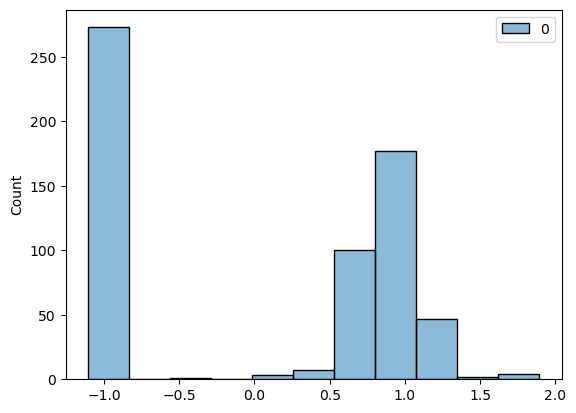

In [20]:
sns.histplot(la_trans)

#QQ PLOT

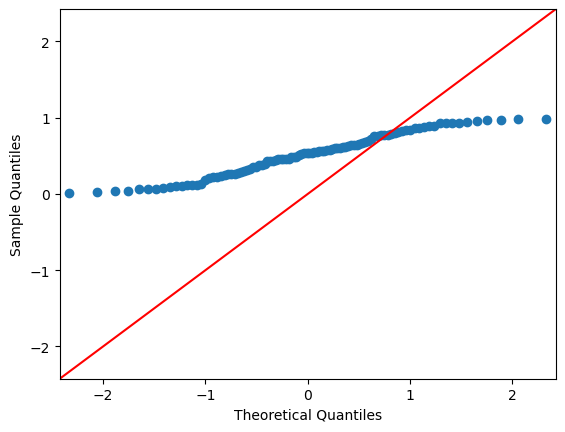

In [23]:
import numpy as np
import statsmodels.api as sm
import pylab as py

# np.random generates different random numbers every time the code is executed
data = np.random.rand(100)

# QQ plot to check normality
sm.qqplot(data, line='45')
py.show()  # Display the plot
